# 911 Calls - Data Analysis & Visualisation Project #

## Data Fields ##

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("911.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Creation of new features ##

** Creation of a "Reason" column based on the first word of the "title" column **

In [5]:
df["Reason"] = df["title"].apply(lambda x: x.split(":")[0])

In [6]:
df.Reason.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

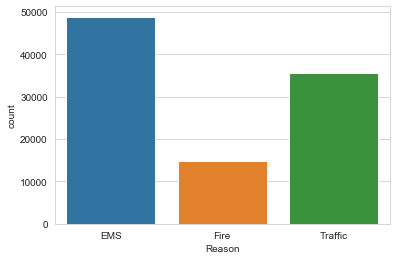

In [7]:
sns.countplot(x="Reason", data = df)

** Creation of "Hours", "Day", and "Month" columns based on the "timeStamp" column **

In [8]:
type(df.timeStamp[0])

str

In [9]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [10]:
df["Hour"] = df["timeStamp"].apply(lambda time: time.hour)
df["Month"] = df["timeStamp"].apply(lambda time: time.month)
df["Day"] = df["timeStamp"].apply(lambda time: time.dayofweek)

In [11]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [12]:
df["Day"] = df["Day"].map(dmap)

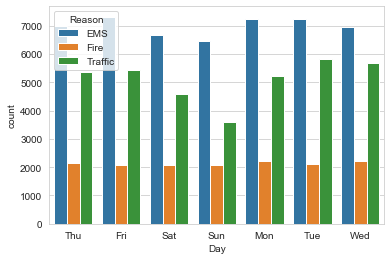

In [13]:
sns.countplot(x="Day", data = df, hue = "Reason")

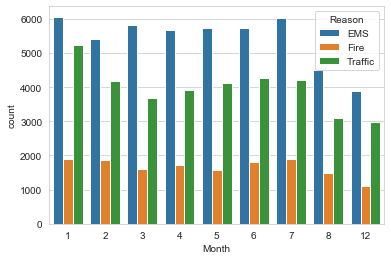

In [14]:
sns.countplot(x="Month", data = df, hue = "Reason")

## Focus on the missing month data ##

In [15]:
byMonth = df.groupby(by = "Month").count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


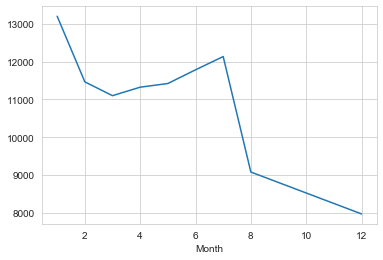

In [16]:
byMonth["lat"].plot()

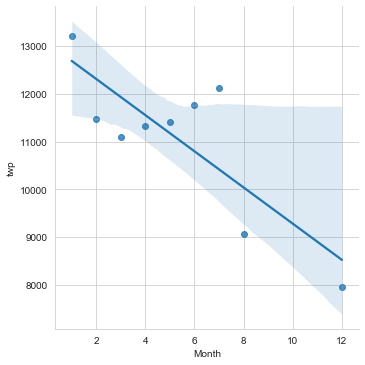

In [17]:
sns.lmplot(x="Month", y="twp", data = byMonth.reset_index())

## Number of calls by reason by Date ##

In [18]:
df["Date"] = df["timeStamp"].apply(lambda x : x.date())

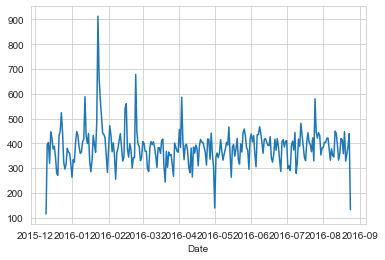

In [19]:
byDate = df.groupby(by = "Date").count()
byDate["twp"].plot()

Text(0.5, 1.0, 'EMS')

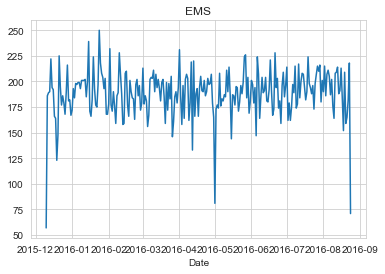

In [20]:
df[df.Reason == "EMS"].groupby(by="Date").count()["twp"].plot()
plt.title("EMS")

Text(0.5, 1.0, 'Fire')

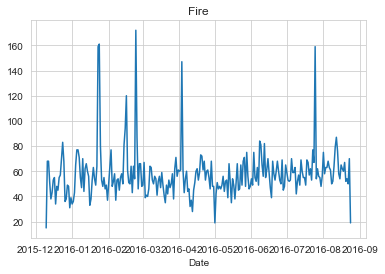

In [21]:
df[df.Reason == "Fire"].groupby(by="Date").count()["twp"].plot()
plt.title("Fire")

Text(0.5, 1.0, 'Traffic')

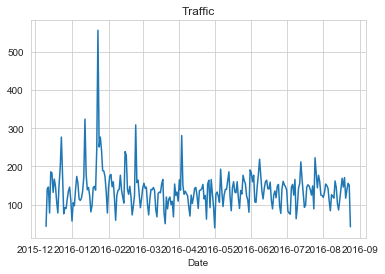

In [22]:
df[df.Reason == "Traffic"].groupby(by="Date").count()["twp"].plot()
plt.title("Traffic")

## Number of calls by Hour by Day of week ##

In [23]:
newdf = df.pivot_table(index = "Day", columns = "Hour",values = "twp", aggfunc = "count")

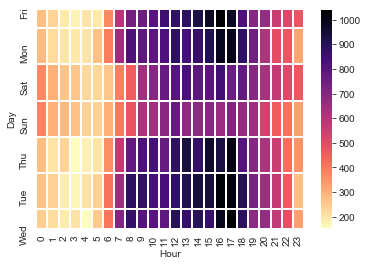

In [24]:
sns.heatmap(newdf, cmap = "magma_r", linecolor = "white", linewidths = 1)

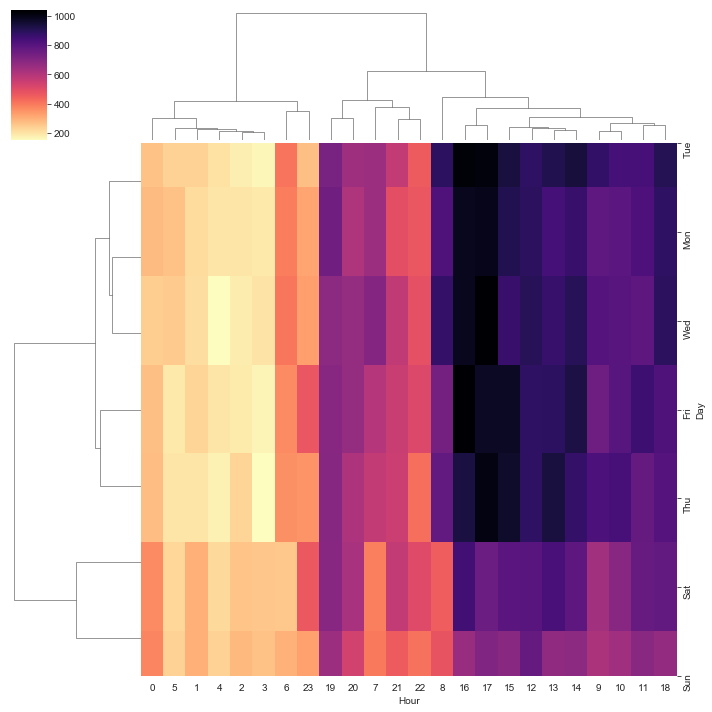

In [25]:
sns.clustermap(newdf, cmap = "magma_r")

## Number of calls by Day of week by Month  ##

In [26]:
newdf2 = df.pivot_table(index = "Day", columns = "Month",values = "twp", aggfunc = "count")

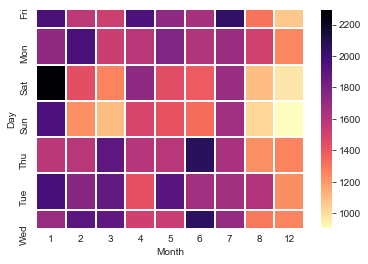

In [27]:
sns.heatmap(newdf2, cmap = "magma_r", linecolor = "white", linewidths = 1)

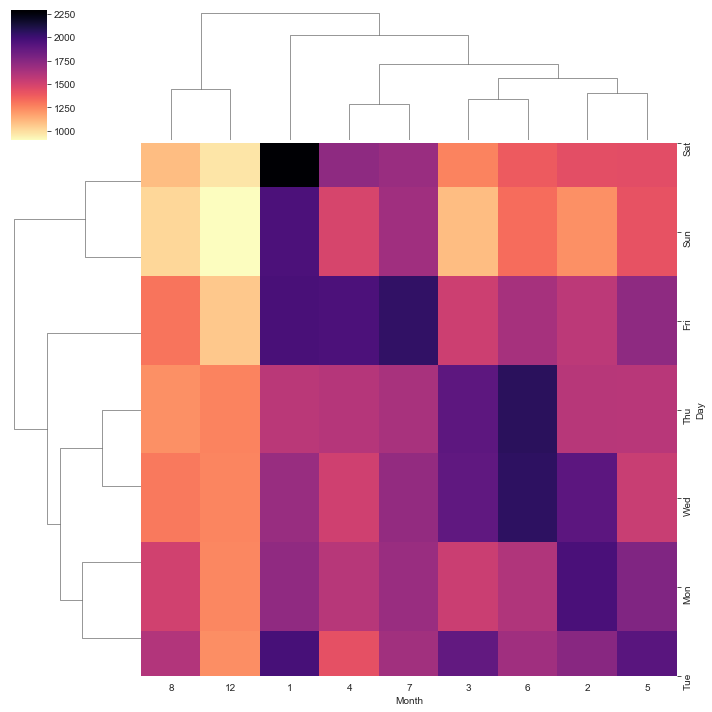

In [28]:
sns.clustermap(newdf2, cmap = "magma_r")